In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from pyfonts import load_google_font
from highlight_text import ax_text, fig_text
from drawarrow import ax_arrow

df = pd.read_csv('share-of-people-who-think-homosexuality-is-never-justified.csv')

In [277]:
countries = {'United States': '#b13507',          #C OUNTRY COLORS
        'Spain': '#4c6a9c',
        'United Kingdom': '#996d39', 
        'Sweden': '#2c8465', 
        'Netherlands': '#6d3e91'}

years = [1984, 2022]

fonts = {'title' : load_google_font('Playfair Display'), 
         'labels_reg': load_google_font('Libre Franklin'),
         'labels_bold': load_google_font('Libre Franklin', weight = 'bold')} 

color_ticks = 'grey'

# Subset of the dataframe with values for the visualisation
df = (df.loc[(df['Entity'].isin(countries)) & (df['Year'].isin(years)),
 ['Entity','Year','Homosexuality: Never justifiable (aggregate)']])

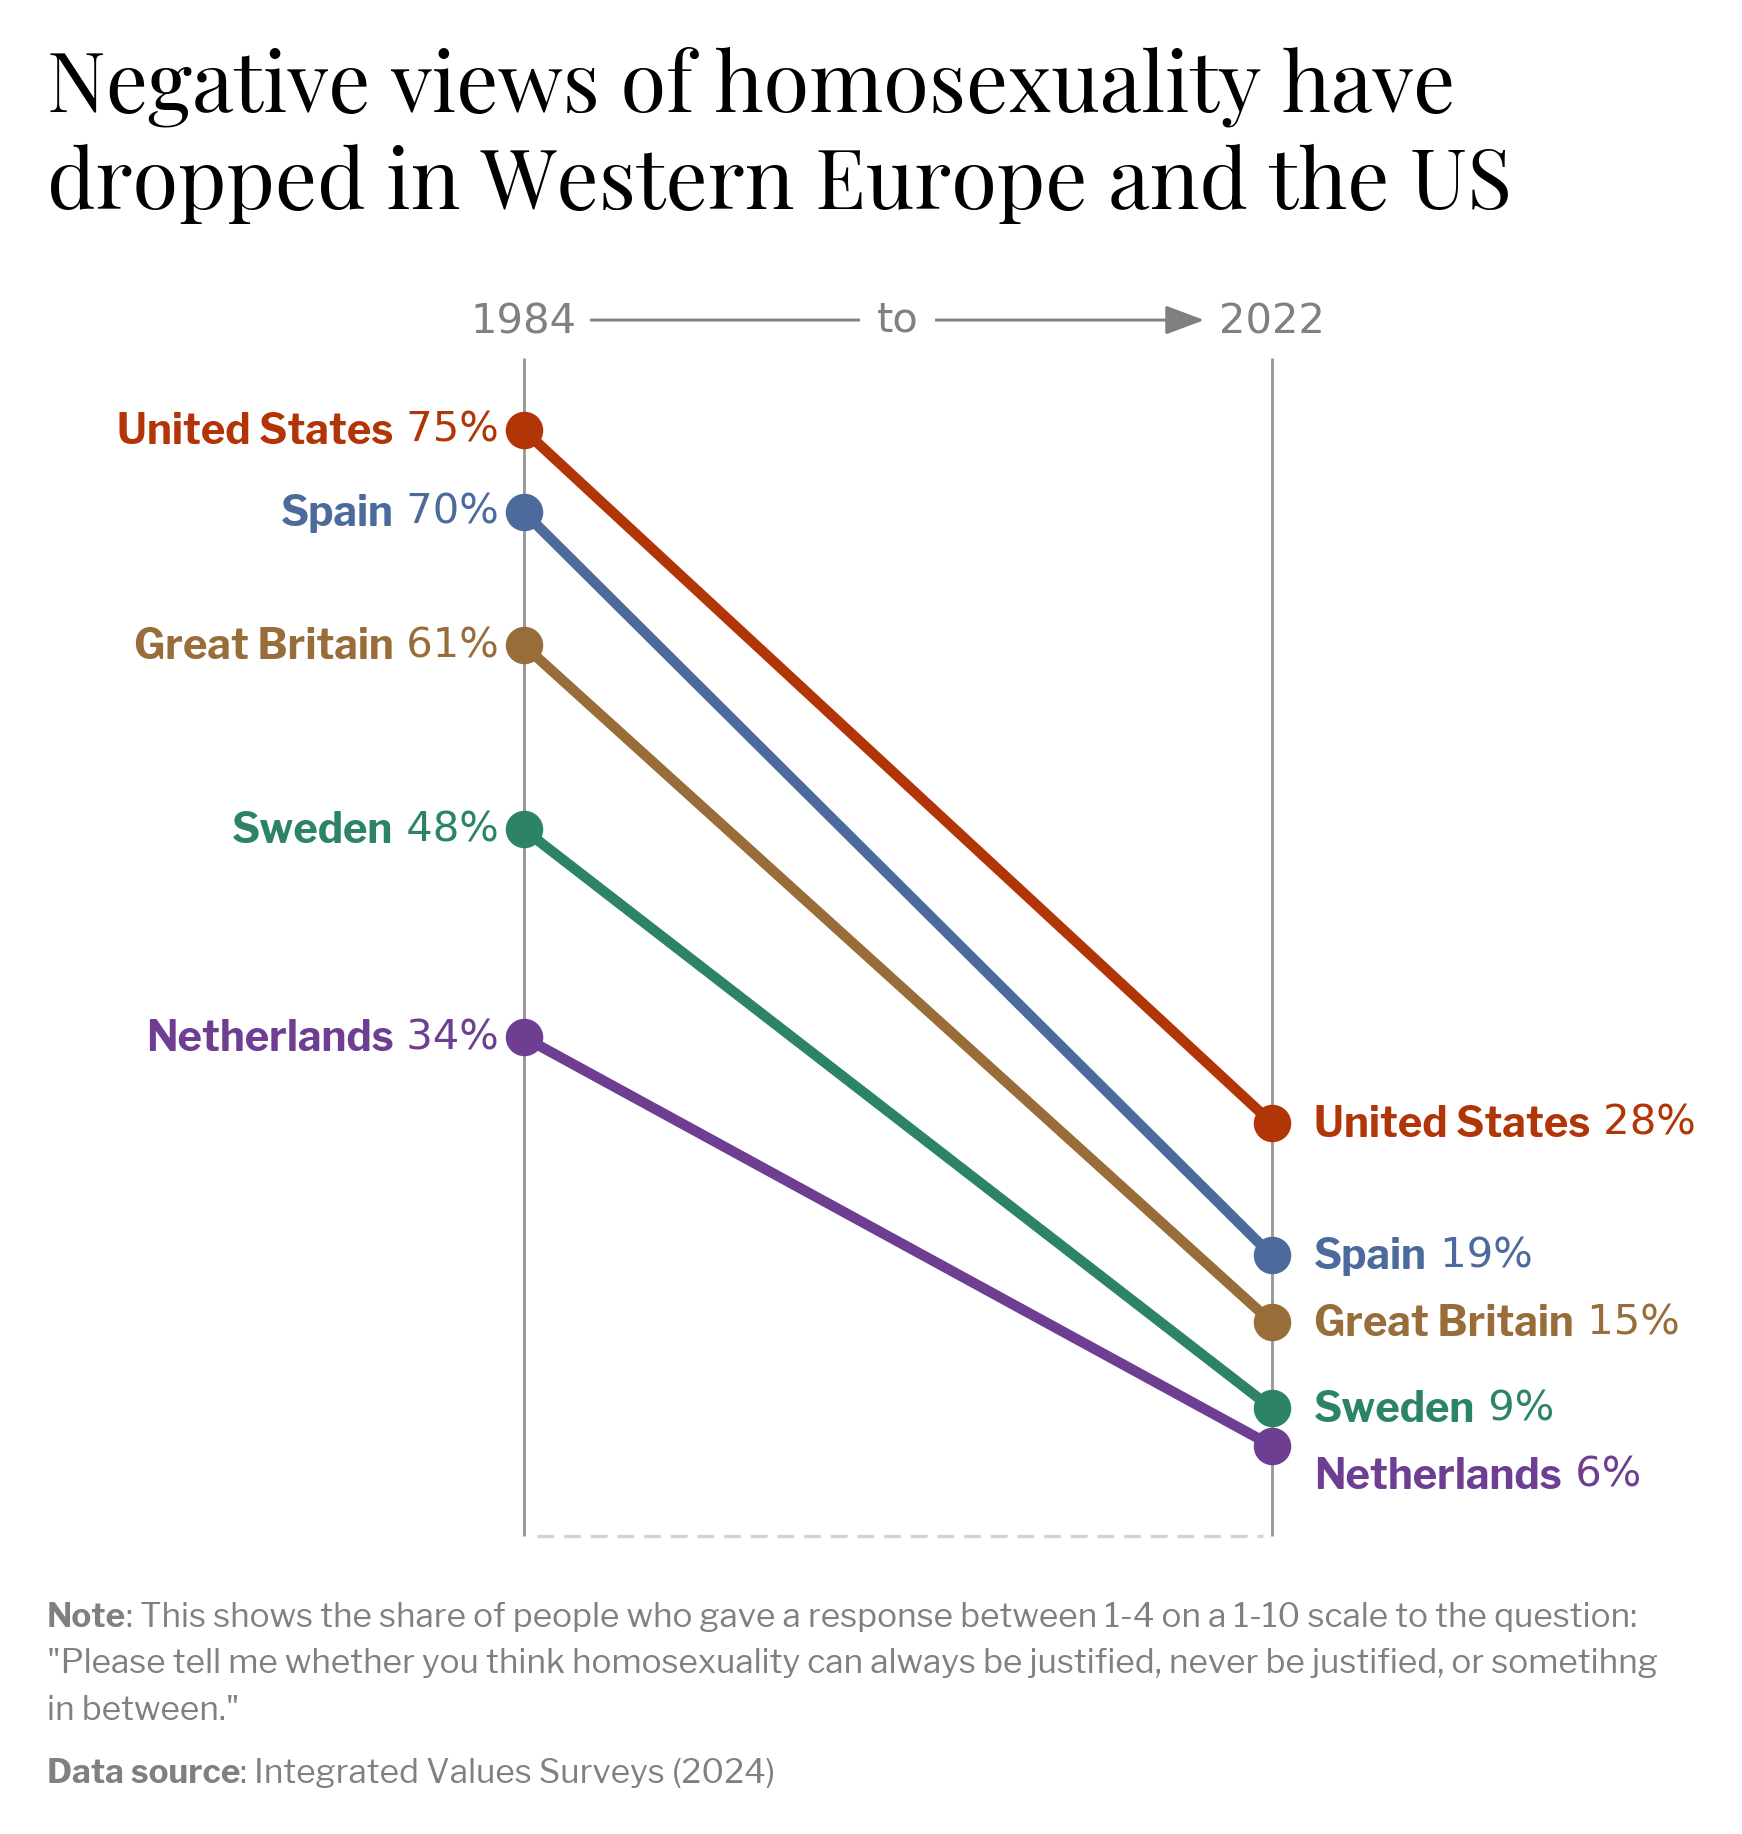

In [279]:
fig, ax = plt.subplots(figsize = (5.85,5.85), dpi = 300, layout = 'tight')

for country in countries:
    past = df.loc[(df['Entity'] == country) & (df['Year'] == 1984), 'Homosexuality: Never justifiable (aggregate)']
    present = df.loc[(df['Entity'] == country) & (df['Year'] == 2022), 'Homosexuality: Never justifiable (aggregate)']
    
    ax.plot(years,                                                                             # Country lines
            [past, present],
           color = countries[country],
           linewidth = 2.5,
           marker = 'o', markersize = 8)
    
    ax_text(x = years[0] - 1.25, y = past,
            s = (f'<{country}> {round(float(past.iloc[0]))}%' if country != 'United Kingdom'    # Country labels left
                 else f'<Great Britain> {round(float(past.iloc[0]))}%'),
           highlight_textprops= [{'font' : fonts['labels_bold']}],
            ha = 'right', va = 'center', fontsize = 10,
            color = countries[country])

    ax_text(x = years[1] + 2.15, 
            y = present if country != 'Netherlands' else present - 2,
            s = (f'<{country}> {round(float(present.iloc[0]))}%' if country != 'United Kingdom'  # Country labels right
                 else f'<Great Britain> {round(float(present.iloc[0]))}%'), 
            highlight_textprops= [{'font' : fonts['labels_bold']}],
            ha = 'left', va = 'center',  fontsize = 10,
            color = countries[country])

for year in years:                                                                              # slope vertical lines    
    ax.vlines(x = year,
            ymin = 0, ymax = 80, color = color_ticks, 
              lw = 0.7,alpha = 0.8, zorder = 0)

ax.hlines(y= 0,                                                                                # bottom horizontal lines 
         xmin = 1984.65, xmax = 2021.55, ls =  (0, (5, 3)), color = 'lightgrey', lw = 0.8)

ax_text(x= 2003, y= 84,
       s = '<to>', fontsize = 10, ha = 'center', 
        highlight_textprops = [{
                                'color': color_ticks,
                                'bbox': {
                                'edgecolor' : 'white',
                                'facecolor' : 'white',
                                'pad': 3.5}
                                }])

ax_arrow(tail_position=(1987, 82.6),
        head_position=(2019, 82.6), width = 0.7,
        color = 'grey', head_width= 3)

fig_text(x = 0.025, y = 1.001, s = 'Negative views of homosexuality have\ndropped in Western Europe and the US', # TITLE
         font = fonts['title'], fontsize = 20)

fig_text(x = 0.025, y = 0.115, s = """<Note>: This shows the share of people who gave a response between 1-4 on a 1-10 scale to the question:
"Please tell me whether you think homosexuality can always be justified, never be justified, or sometihng
in between."

<Data source>: Integrated Values Surveys (2024)""",
         font = fonts['labels_reg'], fontsize = 8, color = 'grey',
        highlight_textprops = [{'font': fonts['labels_bold']},
                              {'font': fonts['labels_bold']}])

ax.tick_params(axis = 'x', length = 0, labeltop=True, labelbottom = False, 
               pad = -10, labelcolor = color_ticks, labelsize = 10)
ax.spines[:].set_visible(False)
ax.set_yticks([])
ax.set_xticks(years)

plt.show()